# 데이터헌트 detection 데이터 labeling

## 1. 이미지 확인하기

In [1]:
!pip install -q matplotlib tqdm

In [2]:
import json
import cv2
import os
import numpy as np
from glob import glob, iglob
import pprint
import random

%matplotlib inline

import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
pp = pprint.PrettyPrinter(indent=4)

In [4]:
image_base_path = './data_labeling/테스트이미지/BUSAN1000/'

In [5]:
image_files = sorted(glob(image_base_path+'*.png'))

In [6]:
print(f'이미지 파일 갯수: {len(image_files)}')

이미지 파일 갯수: 1000


샘플 이미지 경로: ./data_labeling/테스트이미지/BUSAN1000/1838_vid5_00140.png
샘플 이미지 높이: 1080, 너비: 1920


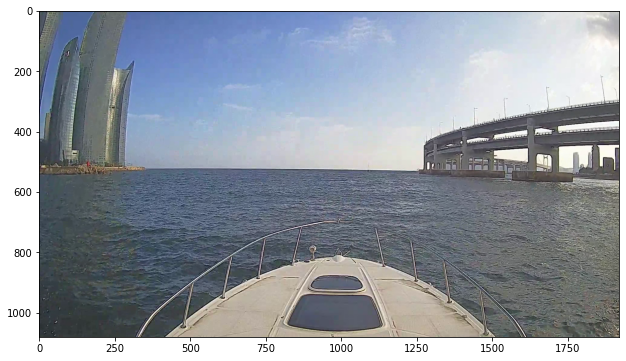

In [7]:
sample_image_path = image_files[0]
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
h, w = sample_image.shape[:2]

print(f"샘플 이미지 경로: {sample_image_path}")
print(f"샘플 이미지 높이: {h}, 너비: {w}")

plt.figure(figsize=(12, 6))
plt.imshow(sample_image)

## 2. 데이터헌트 detection json 파일 확인하기

In [8]:
detection_json_base_path1 = "./data_labeling/데이터헌트/[데이터헌트] detect_json/avikus-s310-results/"
detection_json_base_path2 = "./data_labeling/데이터헌트/[데이터헌트] detect_json/avikus-s324-results/"
detection_json_path1 = sorted(os.listdir(detection_json_base_path1))
detection_json_path2 = sorted(os.listdir(detection_json_base_path2))

In [9]:
detection_json_path = [detection_json_base_path1+file for file in detection_json_path1] + [detection_json_base_path2+file for file in detection_json_path2]
print(f'json 파일 갯수: {len(detection_json_path)}')

json 파일 갯수: 1000


In [10]:
print(f'샘플 json path: {detection_json_path[0]}')

샘플 json path: ./data_labeling/데이터헌트/[데이터헌트] detect_json/avikus-s310-results/4036043-1838_vid5_00140.png.json


In [11]:
# 임시 json load
with open(detection_json_path[0]) as f:
    data = json.load(f)
    pp.pprint(data)

{   'driving condition': 'offshore',
    'images': [   {   'url': 'https://datahunt.s3.ap-northeast-2.amazonaws.com/undefined/2021/12/1639727476560_1838_vid5_00140.png'}],
    'labels': [   {   'boundingPoly': {   'type': 'RECT',
                                          'vertices': [   {   'x': 1083.7343159126394,
                                                              'y': 523.5914245694936},
                                                          {   'x': 1105.8568398901652,
                                                              'y': 523.5914245694936},
                                                          {   'x': 1105.8568398901652,
                                                              'y': 540.1967623221977},
                                                          {   'x': 1083.7343159126394,
                                                              'y': 540.1967623221977}]},
                      'dataIndex': 0,
                      'key': 'ship

## 3. 샘플 이미지에 bounding box 그리기

이미지 path: ./data_labeling/테스트이미지/BUSAN1000/5526_vid5_38700.png
이미지 파일 존재 유무: True
샘플 이미지 높이: 1080, 너비: 1920
{   'boundingPoly': {   'type': 'RECT',
                        'vertices': [   {   'x': 944.6379851865757,
                                            'y': 587.7053328374246},
                                        {   'x': 961.6378458332337,
                                            'y': 587.7053328374246},
                                        {   'x': 961.6378458332337,
                                            'y': 599.8146947410537},
                                        {   'x': 944.6379851865757,
                                            'y': 599.8146947410537}]},
    'dataIndex': 0,
    'key': 'buoy',
    'label': 'buoy',
    'timestamp': 1640595133486}


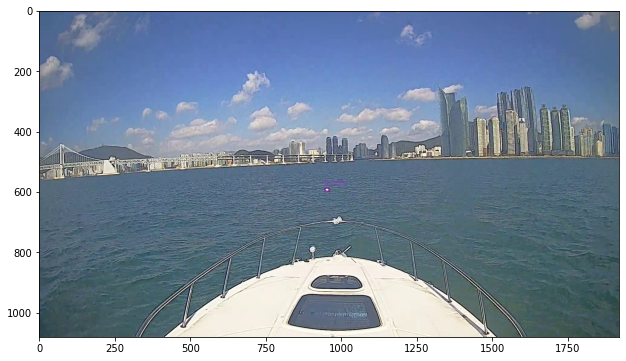

In [12]:
colors = [
    (0, 0, 255),
    (0, 255, 0),
    (255, 0, 204),
    (255, 204, 0),
    (153, 51, 255),
]

label2idx = {
    'ship':0,
    'jetski':1,
    'buoy':2,
    'light buoy':3,
    'undefined':4
}

rand_idx = random.randint(0, 1000)

with open(detection_json_path[rand_idx]) as f:
    data = json.load(f)
    file_name = data['name']
    image_path = image_base_path+file_name
    print(f"이미지 path: {image_path}")
    print(f"이미지 파일 존재 유무: {os.path.exists(image_path)}")
    
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    print(f"샘플 이미지 높이: {h}, 너비: {w}")
    labels = data['labels']
    for label in labels:
        pp.pprint(label)
        name = label['label']
        bbox = label['boundingPoly']['vertices']
        
        lu_x = int(bbox[0]['x'])
        lu_y = int(bbox[0]['y'])
        rd_x = int(bbox[2]['x'])
        rd_y = int(bbox[2]['y'])
        
        cv2.rectangle(img=image,
                      pt1=(lu_x,lu_y),
                      pt2=(rd_x,rd_y),
                      color=colors[label2idx[name]],
                      thickness=1,
                      lineType=cv2.LINE_AA)
        
        cv2.putText(img=image,
                    text=name,
                    org=(lu_x, lu_y-10),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1,
                    color=colors[label2idx[name]])
    
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 4. 전체 이미지에 적용해서 저장하기

In [13]:
save_path = './data_labeling/데이터헌트/[데이터헌트] detect_json/draw_detect_bbox/'
os.makedirs(save_path, exist_ok=True)

In [14]:
colors = [
    (0, 0, 255),
    (0, 255, 0),
    (255, 0, 204),
    (255, 204, 0),
    (153, 51, 255),
]

label2idx = {
    'ship':0,
    'jetski':1,
    'buoy':2,
    'light buoy':3,
    'undefined':4
}

for json_file in tqdm(detection_json_path):
    with open(json_file) as f:
        data = json.load(f)
        file_name = data['name']
        image_path = image_base_path+file_name
#         print(f"이미지 path: {image_path}")
#         print(f"이미지 파일 존재 유무: {os.path.exists(image_path)}")

        image = cv2.imread(image_path)
        h, w = image.shape[:2]
#         print(f"샘플 이미지 높이: {h}, 너비: {w}")
        labels = data['labels']
        for label in labels:
#             pp.pprint(label)
            name = label['label']
            bbox = label['boundingPoly']['vertices']

            lu_x = int(bbox[0]['x'])
            lu_y = int(bbox[0]['y'])
            rd_x = int(bbox[2]['x'])
            rd_y = int(bbox[2]['y'])

            cv2.rectangle(img=image,
                          pt1=(lu_x,lu_y),
                          pt2=(rd_x,rd_y),
                          color=colors[label2idx[name]],
                          thickness=1,
                          lineType=cv2.LINE_AA)

            cv2.putText(img=image,
                        text=name,
                        org=(lu_x, lu_y-10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=1,
                        color=colors[label2idx[name]])

#         plt.figure(figsize=(12, 6))
#         plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        save_name = f"{save_path}{file_name}"
        cv2.imwrite(save_name, image)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:35<00:00, 10.48it/s]


## 5. 이미지 당 Label Count

In [26]:
colors = [
    (0, 0, 255),
    (0, 255, 0),
    (255, 0, 204),
    (255, 204, 0),
    (153, 51, 255),
]

label2idx = {
    'ship':0,
    'jetski':1,
    'buoy':2,
    'light buoy':3,
    'undefined':4
}

cnts = np.array([0, 0, 0, 0, 0])

for json_file in tqdm(detection_json_path):
    with open(json_file) as f:
        data = json.load(f)
        file_name = data['name']
        image_path = image_base_path+file_name
#         print(f"이미지 path: {image_path}")
#         print(f"이미지 파일 존재 유무: {os.path.exists(image_path)}")

        image = cv2.imread(image_path)
        h, w = image.shape[:2]
#         print(f"샘플 이미지 높이: {h}, 너비: {w}")
        labels = data['labels']
        
        is_exists = np.array([False, False, False, False, False])
    
        for label in labels:
#             pp.pprint(label)
            name = label['label']
            bbox = label['boundingPoly']['vertices']
            
            is_exists[label2idx[name]] = True

        cnts += is_exists
            
#         plt.figure(figsize=(12, 6))
#         plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.82it/s]


In [28]:
print(f"이미지 당 Label 카운트: {cnts}")

이미지 당 Label 카운트: [768  60 388 155 438]
